In [632]:
#import Libraries 
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [633]:
# Read dataset
df = pd.read_csv('bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [634]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [635]:
default_val = {
    0: 'ok',
    1: 'default',
    np.nan: 'unknown'
    }
df.default = df.default.map(default_val)

In [636]:
df.default.value_counts()

ok         517
unknown    450
default    183
Name: default, dtype: int64

In [637]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

## Data exploration

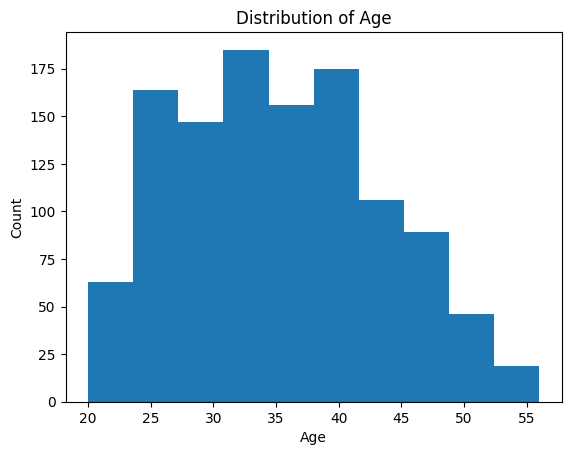

In [638]:
# check the Distribution of Age
plt.hist(df['age'], bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

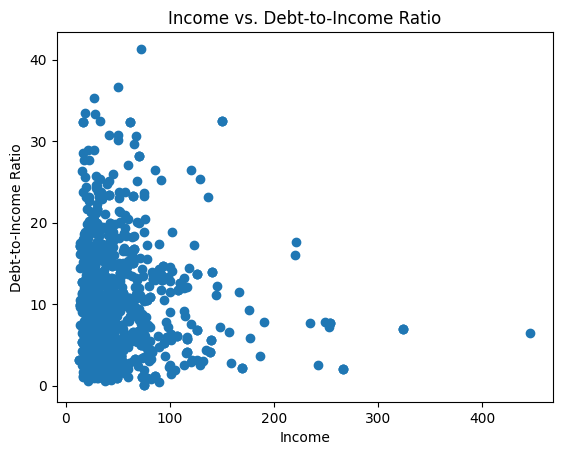

In [639]:
#Income vs. Debt-to-Income Ratio
plt.scatter(df['income'], df['debtinc'])
plt.title('Income vs. Debt-to-Income Ratio')
plt.xlabel('Income')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

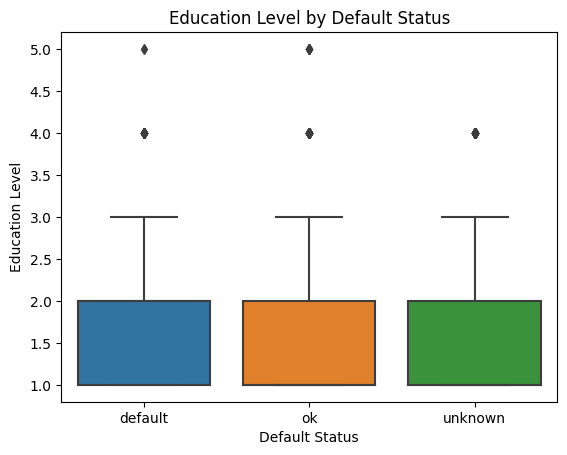

In [651]:
#Education Level by Default Status
sns.boxplot(x='default', y='ed', data=df)
plt.title('Education Level by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Education Level')
plt.show()

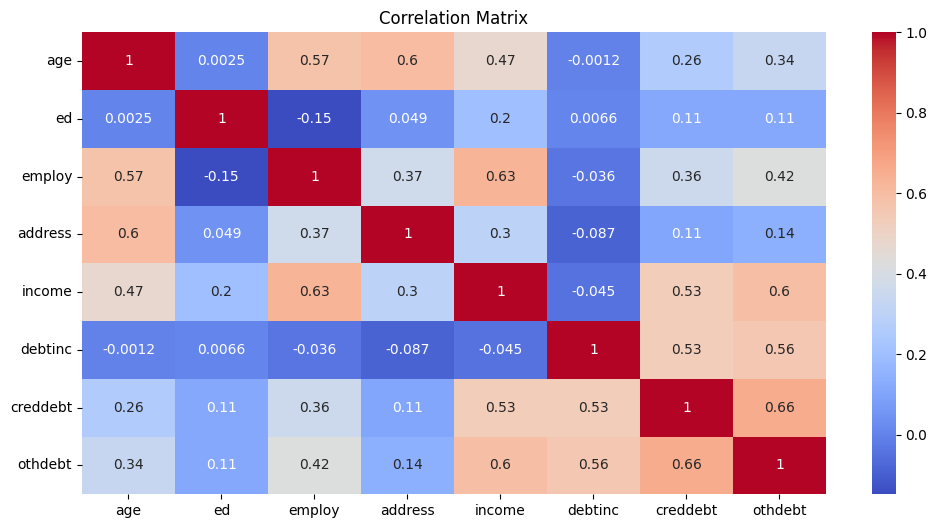

In [655]:
plt.figure(figsize=(12,6))
corr = df[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

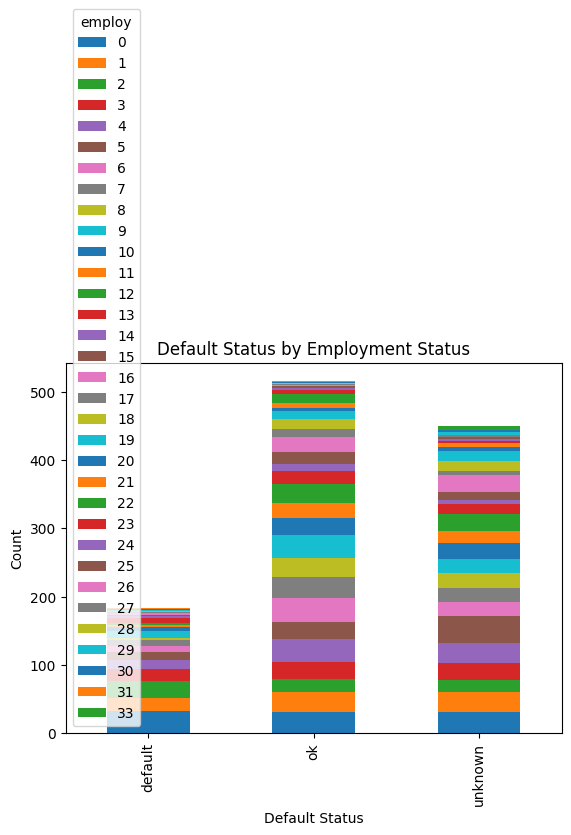

In [642]:
ct = pd.crosstab(df['default'], df['employ'])
ct.plot(kind='bar', stacked=True)
plt.title('Default Status by Employment Status')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

In [585]:
# group data by default
grouped = df.groupby(df['default'])
print(grouped.get_group('unknown'))

      age  ed  employ  address  income  debtinc  creddebt   othdebt  default
700    36   1      16       13      32     10.9  0.544128  2.943872  unknown
701    50   1       6       27      21     12.9  1.316574  1.392426  unknown
702    40   1       9        9      33     17.0  4.880700  0.729300  unknown
703    31   1       5        7      23      2.0  0.046000  0.414000  unknown
704    29   1       4        0      24      7.8  0.866736  1.005264  unknown
...   ...  ..     ...      ...     ...      ...       ...       ...      ...
1145   34   1      12       15      32      2.7  0.239328  0.624672  unknown
1146   32   2      12       11     116      5.7  4.026708  2.585292  unknown
1147   48   1      13       11      38     10.8  0.722304  3.381696  unknown
1148   35   2       1       11      24      7.8  0.417456  1.454544  unknown
1149   37   1      20       13      41     12.9  0.899130  4.389870  unknown

[450 rows x 9 columns]


In [586]:
# convert the unknown credit score variables to dataframe
new_data = pd.DataFrame(grouped.get_group('unknown'))
new_data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,unknown
701,50,1,6,27,21,12.9,1.316574,1.392426,unknown
702,40,1,9,9,33,17.0,4.880700,0.729300,unknown
703,31,1,5,7,23,2.0,0.046000,0.414000,unknown
704,29,1,4,0,24,7.8,0.866736,1.005264,unknown


In [587]:
# saving the DataFrame as a CSV file
#unk_bankloan_data = new_data.to_csv('unk_bankloan.csv', index = True)
#print('\nCSV String:\n', unk_bankloan_data)

In [588]:
# Drop a row by condition (contain unknown)
df = df[df.default != 'unknown']

In [589]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600


In [590]:
# replacing values
df['default'].replace(['ok', 'default'],
[0, 1], inplace=True)

In [591]:
print(df.head())
print(df.shape)

   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608        1
1   27   1      10        6      31     17.3   1.362202  4.000798        0
2   40   1      15       14      55      5.5   0.856075  2.168925        0
3   41   1      15       14     120      2.9   2.658720  0.821280        0
4   24   2       2        0      28     17.3   1.787436  3.056564        1
(700, 9)


## Split data

In [592]:
# split data
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

In [593]:
len(df_full_train), len(df_train), len(df_val), len(df_test)

(560, 420, 140, 140)

In [594]:
# to make the above shuffle data sequential 
X_train = df_train.reset_index(drop = True)
X_val = df_val.reset_index(drop = True)
X_test = df_test.reset_index(drop = True)

In [595]:
# decode the target values from string to int
y_train = df_train.default
y_val = df_val.default
y_test = df_test.default

In [596]:
# remove the default variables 
del X_train['default']
del X_val['default']
del X_test['default']

#### DecisionTree

##### train

In [597]:
# fit the decision tree 
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

##### validation

In [598]:
y_pred = dt.predict_proba(X_val)[:, 1]
y_pred

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1.])

In [599]:
roc_auc_score(y_val, y_pred)

0.5809523809523809

In [600]:
# check roc score for the training datasets 
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

##### parameter tuning

In [601]:
# tuning the parameter  (min_samples_leaf)
for d in [2,3,4,5,6,7, 10, 14,16,17,18]: # this figures are the best max depth from the result derived above
  for s in [1,2,5,10,15,20,50,100,200,500]:
    dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('(%4s, %.3d) - > %.3f' % (d, s, auc))

(   2, 001) - > 0.773
(   2, 002) - > 0.773
(   2, 005) - > 0.773
(   2, 010) - > 0.773
(   2, 015) - > 0.773
(   2, 020) - > 0.773
(   2, 050) - > 0.771
(   2, 100) - > 0.813
(   2, 200) - > 0.729
(   2, 500) - > 0.500
(   3, 001) - > 0.788
(   3, 002) - > 0.788
(   3, 005) - > 0.789
(   3, 010) - > 0.778
(   3, 015) - > 0.740
(   3, 020) - > 0.774
(   3, 050) - > 0.783
(   3, 100) - > 0.806
(   3, 200) - > 0.729
(   3, 500) - > 0.500
(   4, 001) - > 0.762
(   4, 002) - > 0.787
(   4, 005) - > 0.788
(   4, 010) - > 0.767
(   4, 015) - > 0.704
(   4, 020) - > 0.751
(   4, 050) - > 0.784
(   4, 100) - > 0.806
(   4, 200) - > 0.729
(   4, 500) - > 0.500
(   5, 001) - > 0.722
(   5, 002) - > 0.760
(   5, 005) - > 0.703
(   5, 010) - > 0.736
(   5, 015) - > 0.700
(   5, 020) - > 0.735
(   5, 050) - > 0.784
(   5, 100) - > 0.806
(   5, 200) - > 0.729
(   5, 500) - > 0.500
(   6, 001) - > 0.729
(   6, 002) - > 0.769
(   6, 005) - > 0.703
(   6, 010) - > 0.741
(   6, 015) - > 0.715
(   6, 020

In [602]:
# put the result in  a dataframe
scores =[]

for d in [2,3,4,5,6,7, 10, 14,16,17,18]: # this figures are the best max depth from the result derived above
  for s in [1,2,3,4,5,10,15,20,50,100,200,500,1000]:# we can also restrict the depth of leaf using 'None'
    dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((d, s, auc))

In [603]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,2,1,0.772517
1,2,2,0.772517
2,2,3,0.772517
3,2,4,0.772517
4,2,5,0.772517


In [604]:
# sort the result in ascending
df_scores.sort_values(by = 'auc',ascending = False)

,max_depth,min_samples_leaf,auc
9,2,100,0.812653
22,3,100,0.805578
61,6,100,0.805578
74,7,100,0.805578
87,10,100,0.805578
...,...,...,...
51,5,1000,0.500000
76,7,500,0.500000
63,6,500,0.500000
103,14,1000,0.500000


In [605]:
df_scores.pivot = df_scores.pivot(index = ['min_samples_leaf'], 
                                  columns= ['max_depth'], values = ['auc'])
df_scores.pivot.round(3)  # round to reduce the decimal points 

auc                                                   \
max_depth            2      3      4      5      6      7      10     14   
min_samples_leaf                                                           
1                 0.773  0.788  0.762  0.749  0.728  0.724  0.626  0.657   
2                 0.773  0.788  0.787  0.760  0.728  0.749  0.705  0.679   
3                 0.773  0.788  0.788  0.775  0.753  0.739  0.666  0.686   
4                 0.773  0.788  0.787  0.703  0.689  0.689  0.688  0.682   
5                 0.773  0.789  0.789  0.701  0.693  0.705  0.701  0.689   
10                0.773  0.778  0.767  0.715  0.742  0.734  0.741  0.736   
15                0.773  0.740  0.704  0.700  0.716  0.725  0.724  0.724   
20                0.773  0.774  0.751  0.735  0.746  0.745  0.745  0.746   
50                0.771  0.783  0.784  0.784  0.784  0.784  0.784  0.784   
100               0.813  0.806  0.806  0.806  0.806  0.806  0.806  0.806   
200               0.729  0.729  0.729  0.729  0.729  0.729  0.729  0.729   
500               0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500   
1000              0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500   

                                       
max_depth            16     17     18  
min_samples_leaf                       
1                 0.629  0.671  0.643  
2                 0.679  0.662  0.670  
3                 0.678  0.739  0.676  
4                 0.689  0.694  0.697  
5                 0.687  0.715  0.694  
10                0.740  0.727  0.725  
15                0.724  0.724  0.725  
20                0.746  0.746  0.745  
50                0.784  0.784  0.784  
100               0.806  0.806  0.806  
200               0.729  0.729  0.729  
500               0.500  0.500  0.500  
1000              0.500  0.500  0.500

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

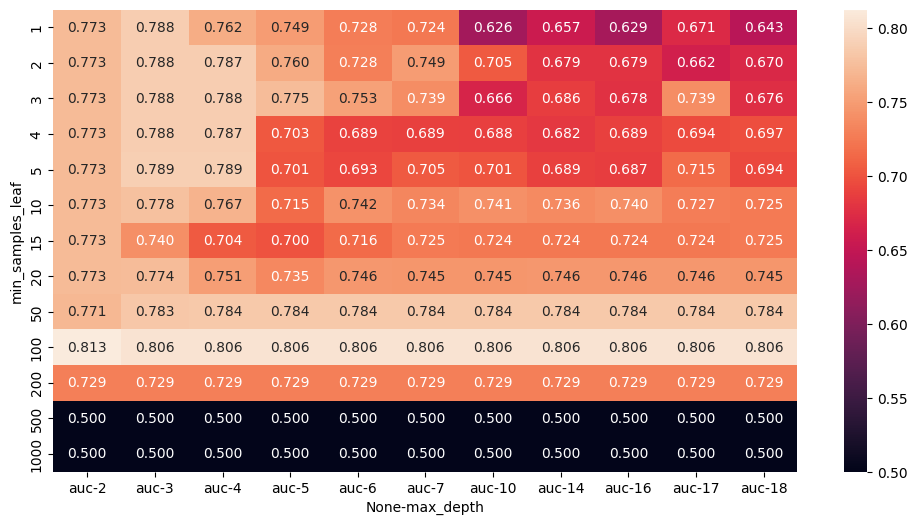

In [606]:
# visualise the result with heatmap
import seaborn as sns

# Set figure size
plt.figure(figsize=(12,6))
sns.heatmap(df_scores.pivot, annot = True, fmt = '.3f')


In [607]:
# fit the model
dt = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 100, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=100, random_state=1)

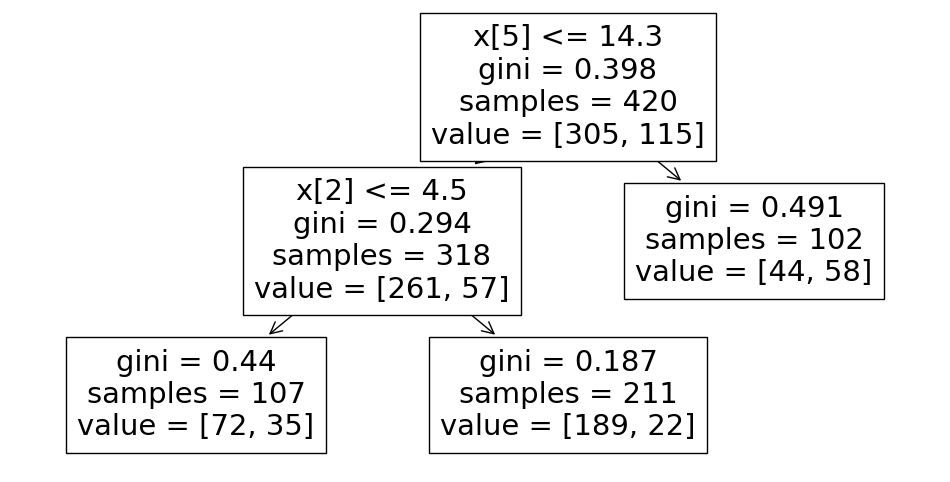

In [608]:
# Plot decision tree
fig, ax = plt.subplots(figsize=(12, 6))
plot_tree(dt, ax=ax)
plt.show()

In [609]:
y_pred = dt.predict_proba(X_val)[:, 1]
y_pred

array([0.56862745, 0.3271028 , 0.56862745, 0.56862745, 0.1042654 ,
       0.1042654 , 0.3271028 , 0.1042654 , 0.56862745, 0.3271028 ,
       0.3271028 , 0.3271028 , 0.3271028 , 0.56862745, 0.1042654 ,
       0.56862745, 0.1042654 , 0.56862745, 0.1042654 , 0.56862745,
       0.3271028 , 0.1042654 , 0.56862745, 0.1042654 , 0.56862745,
       0.1042654 , 0.1042654 , 0.1042654 , 0.1042654 , 0.56862745,
       0.1042654 , 0.3271028 , 0.56862745, 0.3271028 , 0.1042654 ,
       0.3271028 , 0.56862745, 0.1042654 , 0.1042654 , 0.1042654 ,
       0.1042654 , 0.3271028 , 0.56862745, 0.56862745, 0.3271028 ,
       0.1042654 , 0.56862745, 0.1042654 , 0.1042654 , 0.3271028 ,
       0.3271028 , 0.3271028 , 0.1042654 , 0.1042654 , 0.3271028 ,
       0.1042654 , 0.1042654 , 0.3271028 , 0.3271028 , 0.3271028 ,
       0.1042654 , 0.3271028 , 0.56862745, 0.56862745, 0.1042654 ,
       0.1042654 , 0.1042654 , 0.56862745, 0.1042654 , 0.56862745,
       0.56862745, 0.1042654 , 0.1042654 , 0.1042654 , 0.56862

In [610]:
roc_auc_score(y_val, y_pred)

0.8126530612244898

# Rainforest 

Training

In [612]:
# create randomforest classifier and set n_estimators =10, the default parameter of n_estimators is =100
rf = RandomForestClassifier(random_state=11) # then include the random_state for a fix result
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

Validation

In [613]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.874421768707483

RaindomForest parameter tuning

In [614]:
# including the max depth just like how we have it in decision tree
# to get the max_depth
scores = []

for d in [5, 7, 10, 14, 17, 18]: # this figures are the best max depth from the result derived above
  for n in range (10, 101, 10): # we can also restrict the depth of leaf using 'None'
    for s in [1,3,4,5,6]:
      rf = RandomForestClassifier(n_estimators =n, max_depth = d, min_samples_leaf = s, random_state =11)
      rf.fit(X_train, y_train)

      y_pred = rf.predict_proba(X_val)[:, 1]
      auc = roc_auc_score(y_val, y_pred)
      scores.append((d, n, s, auc))

In [615]:
scores

[(5, 10, 1, 0.8779591836734694),
 (5, 10, 3, 0.853469387755102),
 (5, 10, 4, 0.839047619047619),
 (5, 10, 5, 0.8382312925170068),
 (5, 10, 6, 0.8455782312925171),
 (5, 20, 1, 0.8862585034013606),
 (5, 20, 3, 0.862857142857143),
 (5, 20, 4, 0.8729251700680272),
 (5, 20, 5, 0.8604081632653062),
 (5, 20, 6, 0.8604081632653062),
 (5, 30, 1, 0.8908843537414967),
 (5, 30, 3, 0.8620408163265306),
 (5, 30, 4, 0.8685714285714285),
 (5, 30, 5, 0.8609523809523809),
 (5, 30, 6, 0.8565986394557823),
 (5, 40, 1, 0.8789115646258504),
 (5, 40, 3, 0.8658503401360543),
 (5, 40, 4, 0.8723809523809524),
 (5, 40, 5, 0.8614965986394558),
 (5, 40, 6, 0.8598639455782313),
 (5, 50, 1, 0.8759183673469387),
 (5, 50, 3, 0.8680272108843539),
 (5, 50, 4, 0.8726530612244898),
 (5, 50, 5, 0.8672108843537415),
 (5, 50, 6, 0.865578231292517),
 (5, 60, 1, 0.877278911564626),
 (5, 60, 3, 0.867482993197279),
 (5, 60, 4, 0.8685714285714285),
 (5, 60, 5, 0.8642176870748299),
 (5, 60, 6, 0.8568707482993196),
 (5, 70, 1, 0.87

In [616]:
columns = ['max_depth','n_estimators', 'min_sample', 'auc']
rf_scores = pd.DataFrame(scores, columns = columns)
# sort the result in ascending
rf_scores.sort_values(by = 'auc',ascending = False)

,max_depth,n_estimators,min_sample,auc
10,5,30,1,0.890884
5,5,20,1,0.886259
145,10,100,1,0.882993
140,10,90,1,0.880000
40,5,90,1,0.880000
...,...,...,...,...
54,7,10,6,0.823537
103,10,10,5,0.822857
150,14,10,1,0.817143
200,17,10,1,0.814694


In [617]:
# retrain the model
rf = RandomForestClassifier(n_estimators =30, max_depth = 7, 
                                min_samples_leaf = 3, random_state =1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, n_estimators=30,
                       random_state=1)

In [618]:
# Evaluate with the validation set
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.8810884353741497

In [619]:
# check the training auc score
y_pred = rf.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
auc

0.979672131147541

## Evaluating the best model on test dataset
----------The best model is RaindomForest

In [620]:
# training the model using that full data (train + val)
rf =   rf = RandomForestClassifier(n_estimators=40, max_depth=9, 
                                min_samples_leaf=7, random_state=1)
rf.fit(df_full_train.drop('default', axis=1), df_full_train['default'].values)

RandomForestClassifier(max_depth=9, min_samples_leaf=7, n_estimators=40,
                       random_state=1)

In [621]:
# testing auc score
y_pred = rf.predict_proba(df_test.drop('default', axis=1))[:, 1]
auc = roc_auc_score(df_test['default'].values, y_pred)
auc

0.7856131407533277

In [622]:
# training auc score

y_pred = rf.predict_proba(df_full_train.drop('default', axis=1))[:, 1]
auc = roc_auc_score(df_full_train.default.values, y_pred)
auc

0.9511219512195122

## Save Model

In [623]:
import joblib

# Save the model
joblib.dump(rf, 'model.scoring')
#load the model using joblib.load('model.joblib')



['model.scoring']

## Make prediction on new data

In [624]:
# Load the model
rf = joblib.load('model.scoring')

# Load the new data
new_data = pd.read_csv('unk_bankloan.csv')
new_data = new_data.drop(['default', 'Unnamed: 0'], axis = 1)

# Make predictions on the new data
predictions = rf.predict(new_data)

# Print the predictions
print(predictions)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0]


In [625]:
# Add predictions to new data dataframe
new_data['default'] = predictions

# Print the new data with predictions
print(new_data)

     age  ed  employ  address  income  debtinc  creddebt   othdebt  default
0     36   1      16       13      32     10.9  0.544128  2.943872        0
1     50   1       6       27      21     12.9  1.316574  1.392426        0
2     40   1       9        9      33     17.0  4.880700  0.729300        0
3     31   1       5        7      23      2.0  0.046000  0.414000        0
4     29   1       4        0      24      7.8  0.866736  1.005264        0
..   ...  ..     ...      ...     ...      ...       ...       ...      ...
445   34   1      12       15      32      2.7  0.239328  0.624672        0
446   32   2      12       11     116      5.7  4.026708  2.585292        0
447   48   1      13       11      38     10.8  0.722304  3.381696        0
448   35   2       1       11      24      7.8  0.417456  1.454544        0
449   37   1      20       13      41     12.9  0.899130  4.389870        0

[450 rows x 9 columns]


In [626]:
columns = ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default']

pd.DataFrame(new_data, columns = columns)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,36,1,16,13,32,10.9,0.544128,2.943872,0
1,50,1,6,27,21,12.9,1.316574,1.392426,0
2,40,1,9,9,33,17.0,4.880700,0.729300,0
3,31,1,5,7,23,2.0,0.046000,0.414000,0
4,29,1,4,0,24,7.8,0.866736,1.005264,0
...,...,...,...,...,...,...,...,...,...
445,34,1,12,15,32,2.7,0.239328,0.624672,0
446,32,2,12,11,116,5.7,4.026708,2.585292,0
447,48,1,13,11,38,10.8,0.722304,3.381696,0
448,35,2,1,11,24,7.8,0.417456,1.454544,0
